# Sintonía de controladores PID con base en los modelos de curva de reacción


En esta práctica vamos a sintonizar y probar controladores PI y PID para los sistemas que usamos en el laboratorio, a saber:

+ El sistema térmico
+ Control de velocidad de un Motor D.C.
+ Control de Ángulo de un Motor D.C.

## 1. Configuración

---

### Instalación de las librerias unthermal y unmotor

Ejecutar esta celda solo para instalar por primera vez o actualizar la libreria. __Asegúrese de instalar  [Git](https://git-scm.com/download/win/ "Git").__

<div class="alert alert-block alert-danger">
⚠️ Ejecutar en el terminal solo  para instalar la libreria 
</div>



Ejecute los siguientes comandos en la terminal (bash) de visual studio code solo para instalar o reinstalar las librerias del motor y del sistema térmico. __Asegúrese de instalar  [Git](https://git-scm.com/download/win/ "Git").__

`pip install --ignore-installed  git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code`

`pip install --ignore-installed  git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code`


Si la instalación reporta algún error de permisos del sistema operativo, use esta opción:


`pip install --ignore-installed --user git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code`

`pip install --ignore-installed --user git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code`


### Importación de comandos de la libreria unthermal y unmotor

A continuación importamos los comandos básicos que usaremos de la libreria `unthermal` y la libreria `Matplotlib` para las figuras.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import unthermal as temp
import unmotor as motor


### Definición de los sistemas en el IoT

Lo primero que necesitamos es definir tanto el sistema térmico como el motor como sistemas IoT, a continuación.

In [2]:
mi_termico = temp.ThermalSystemIoT(plant_number = "XXXX" , broker_address = "192.168.1.100", port=1883)
mi_motor = motor.MotorSystemIoT(plant_number = "PC-M-14" , broker_address = "192.168.1.100", port=1883) 

## Sintonia de controladores PI para el motor DC en velocidad

---


A continuación vamos a usar los mismos métodos de sintonía para el control de velocidad del motor DC. Primero usaremos el método de Ziegler-Nichols. 

Para ello obtengamos un modelo FOTD "fresco" para una velocidad de $y_{op}=360°$. Esto lo podemos hacer, dado que el experimento es muy rápido. 

Connected successfully to MQTT Broker!
Subscribed:  229   (2,)


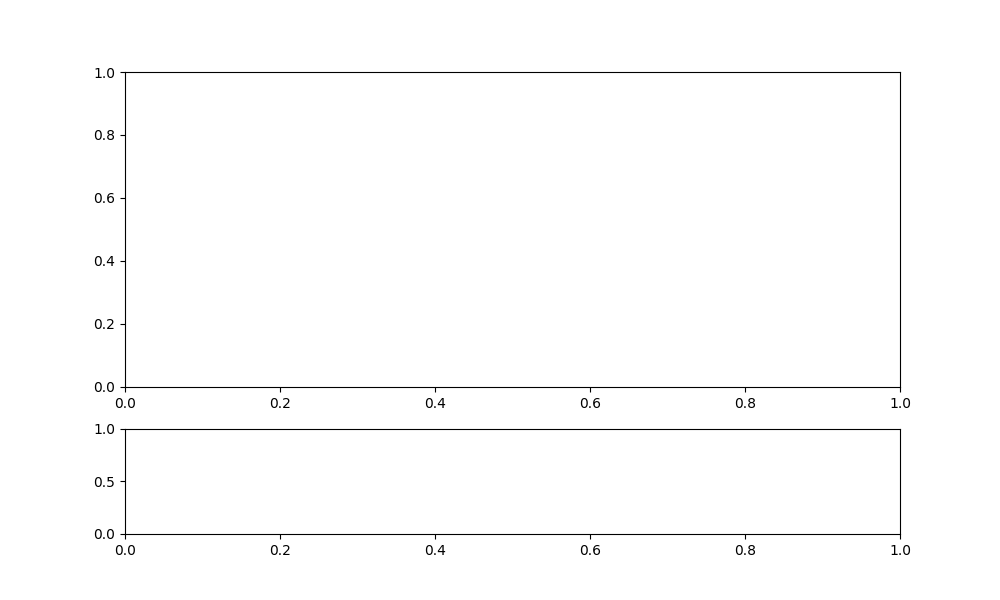

0.54701257 0.69885367
259.45717529319995 359.8714569114001


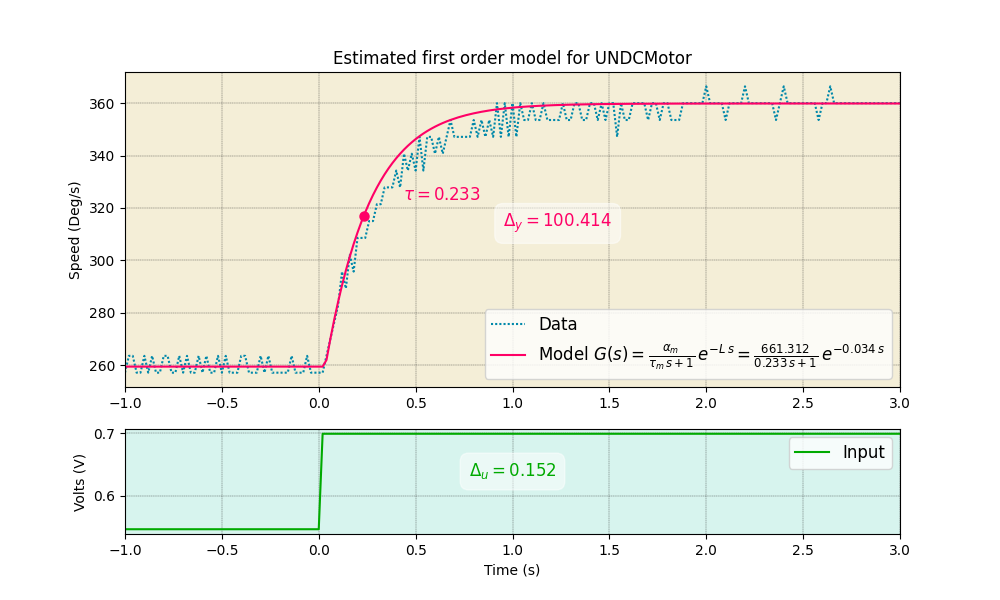

In [95]:
alfa, tau, L = motor.get_fomodel_step(mi_motor, yop = 360)
plt.savefig("Modelo_de_paso_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

Y, por medio del siguiente código, programamos el controlador PI sintonizado por las reglas de Ziegler - Nichols. 

| **Propuesto por** | **Ganancia Proporcional** $k_p$                | **Ganancia Integral** $k_i$                | 
|-------------------------|------------------------------------------------|--------------------------------------------|
| **Ziegler - Nichols**                  | $0.9 \times \dfrac{\tau}{\alpha L}$      | $ \dfrac{0.3 \, \tau}{\alpha \, L^2}$ |

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  355   (2,)


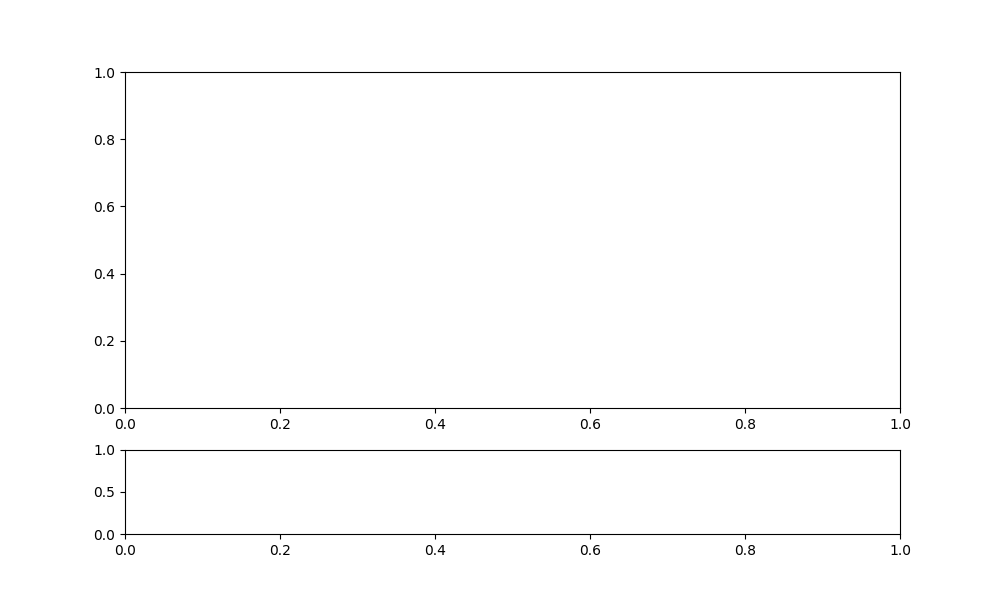

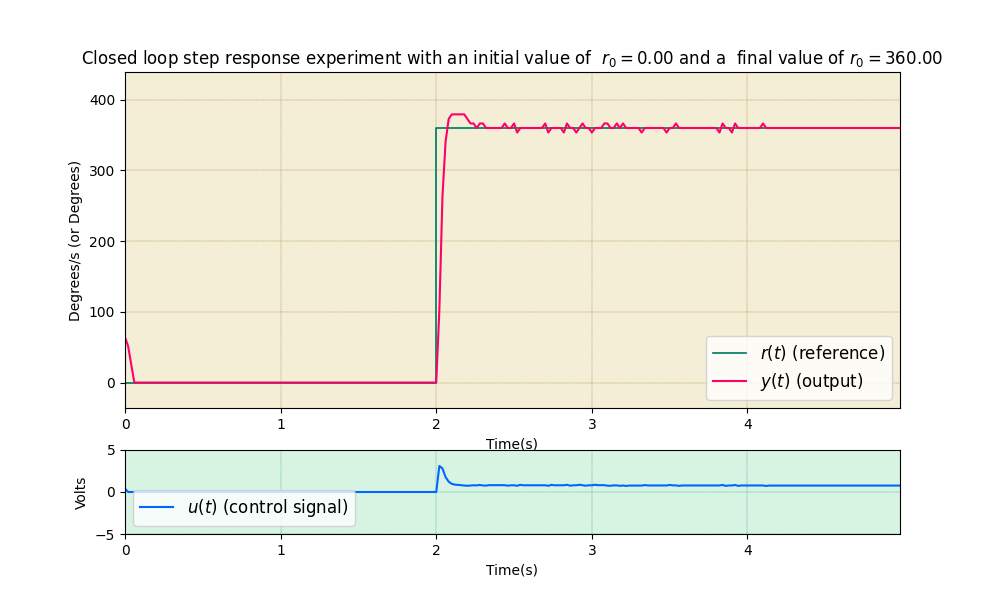

In [165]:
# Reglas de Ziegler Nichols para el motor

# cálculo de las constantes

def Ziegler_Nichols(alfa,tau,L):
    kp = 0.9*tau / (alfa * L) 
    ki = 0.3*tau / (alfa * L**2)
    return kp, ki

# cálculo de las constantes
Kp_zn, Ki_zn = Ziegler_Nichols(alfa,tau,L)


# programación del controlador y obtención de la respuesta al escalónr
motor.set_pid(mi_motor,kp=Kp_zn,ki=Ki_zn,kd=0,beta=1, output="speed")
tzn, rzn, yzn, uzn  =motor.step_closed(mi_motor,r0=0, r1=360, t0=2, t1=3);
plt.savefig("ModeloPaso_Ziegler_Nichols_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

### Experimentos propuestos

Realice los siguientes experimentos con un escalón de referencia de velocidad que cambia desde `r0=0` a `r1=360`.  Para los 2 experimentos use nombres diferentes en las variables de salida para después poderlos graficar conjuntamente.



1. Sintonice un controlador PI por el método de Zhang y obtenga la respuesta de lazo cerrado


| **Propuesto por** | **Ganancia Proporcional** $k_p$                | **Ganancia Integral** $k_i$                | 
|-------------------------|------------------------------------------------|--------------------------------------------|
| **Zhang  (1994)**           |   $\dfrac{\tau}{\alpha\,L}$  | $\dfrac{k_p}{\tau}$|


Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  358   (2,)


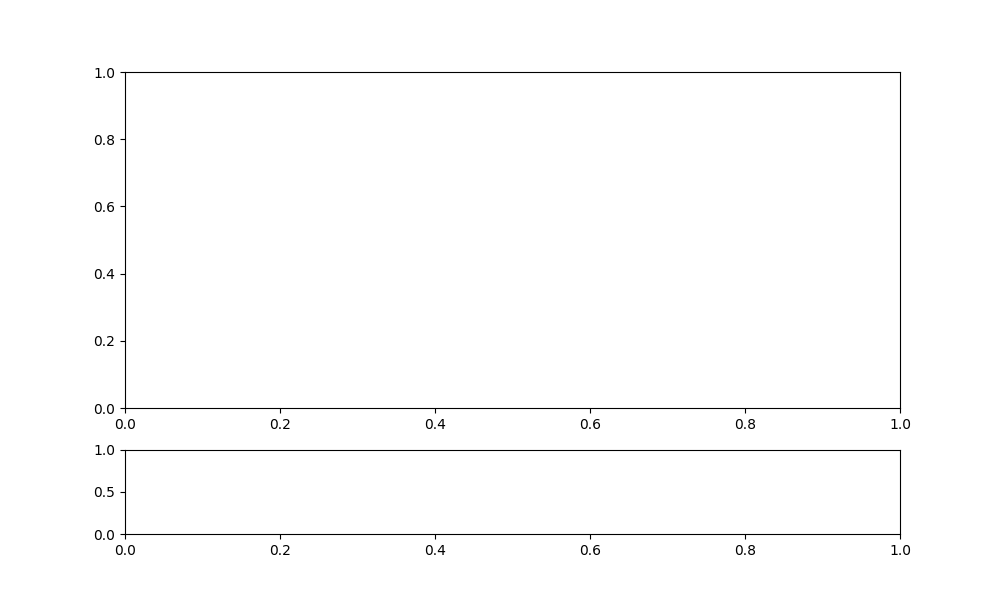

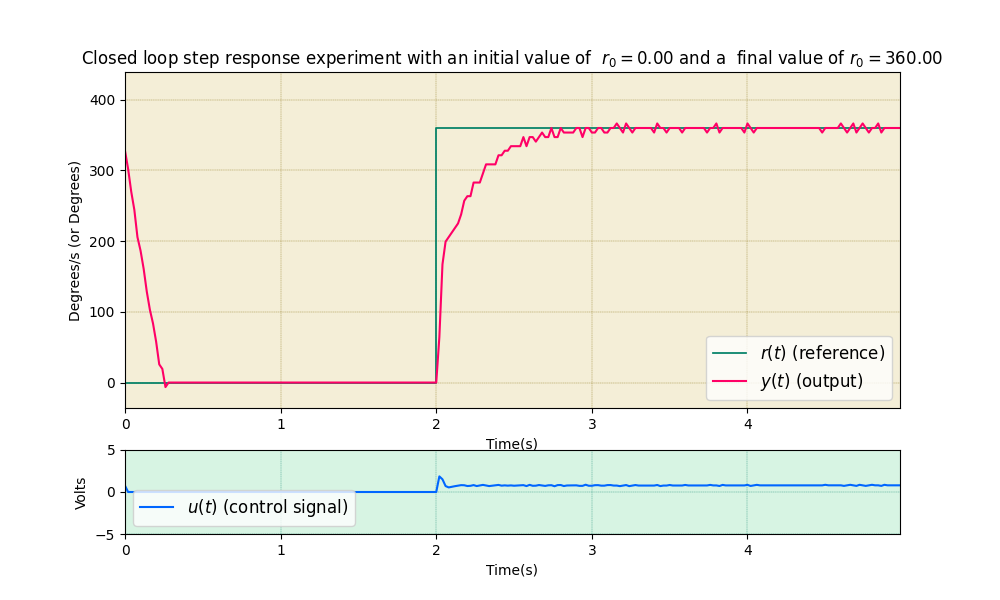

In [166]:
# Reglas de Zhag para el motor

# cálculo de las constantes

def Zhang(alfa,tau,L):
    kp = tau / (alfa * L) 
    ki = kp / (tau)
    return kp,ki

# cálculo de las constantes
Kp_Zhang, Ki_Zhang = Zhang(alfa,tau,L)


# programación del controlador y obtención de la respuesta al escalónr
motor.set_pid(mi_motor,kp=Kp_Zhang,ki=Ki_Zhang,kd=0,beta=1, output="speed")
tzh, rzh, yzh, uzh  =motor.step_closed(mi_motor,r0=0, r1=360, t0=2, t1=3);

plt.savefig("ModeloPaso_Zhag_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

2. Sintonice un controlador PI por el método de Åström and Hägglund y obtenga la respuesta de lazo cerrado


| **Propuesto por** | **Ganancia Proporcional** $k_p$                | **Ganancia Integral** $k_i$                | 
|-------------------------|------------------------------------------------|--------------------------------------------|
|**Åström and Hägglund (2006)**                | $\dfrac{0.15}{\alpha} + \left(0.35 - \dfrac{L \cdot \tau}{(L + \tau)^2}\right) \dfrac{\tau}{\alpha \cdot L} $               |  $\dfrac{k_p}{0.35 \cdot L + \frac{13 \cdot L \cdot \tau^2}{\tau^2 + 12 \cdot L \cdot \tau + 7 \cdot L^2}}$   |


Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  361   (2,)


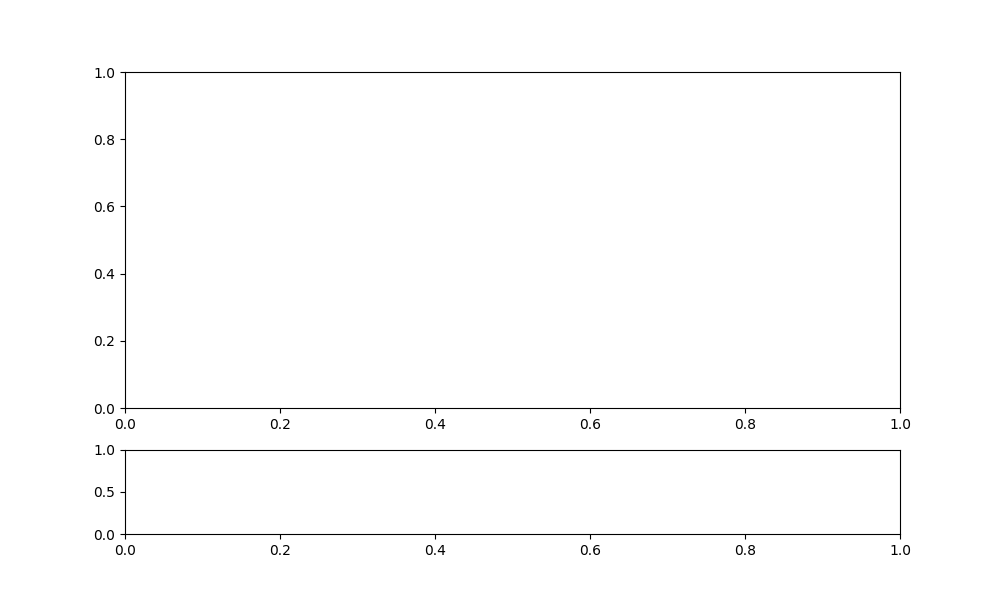

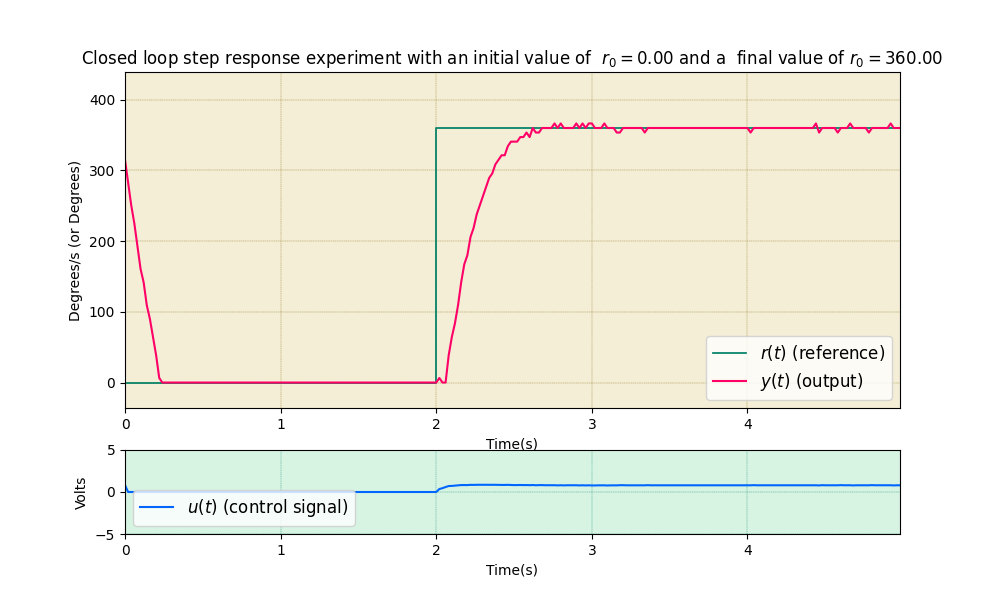

In [167]:
# Reglas de Asmtron and Hagglund para el motor

# cálculo de las constantes

def AmstromHangglund(alfa,tau,L):
    kp = (0.15 / alfa) + (0.35 - (L * tau) / ((L + tau)**2)) * (tau / (alfa * L))
    ki = kp / ((0.35 * L + (13 * L * tau**2) / (tau**2 + 12 * L * tau + 7 * L**2)))
    return kp, ki

# cálculo de las constantes
Kp_ah, Ki_ah = AmstromHangglund(alfa,tau,L)

# programación del controlador y obtención de la respuesta al escalónr
motor.set_pid(mi_motor,kp=Kp_ah,ki=Ki_ah,kd=0,beta=1, output="speed")
tah, rah, yah, uah  =motor.step_closed(mi_motor,r0=0, r1=360, t0=2, t1=3);

plt.savefig("ModeloPaso_Asmtron_Hagglund_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook


#### Pregunta

+ Grafique en una misma gráfica la respuesta de los 3 experimentos de sintonia (Ziegler-Nichols, Zhang, Åström and Hägglund).

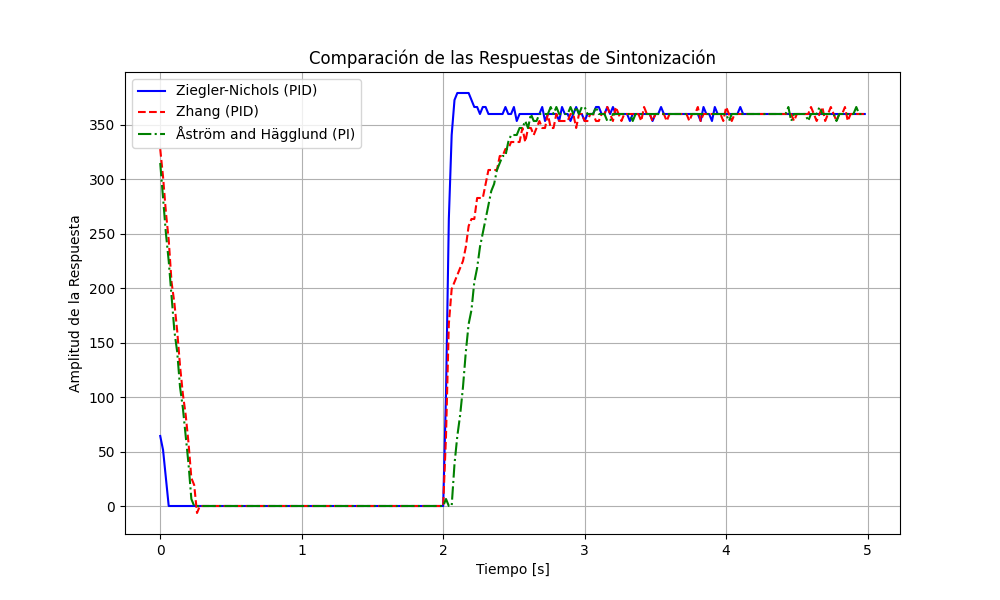

In [168]:
#Graficar las respuestas

plt.figure(figsize=(10, 6))

plt.plot(tzn, yzn, label='Ziegler-Nichols (PID)', linestyle='-', color='b')
plt.plot(tzh, yzh, label='Zhang (PID)', linestyle='--', color='r')
plt.plot(tah, yah, label='Åström and Hägglund (PI)', linestyle='-.', color='g')

plt.title('Comparación de las Respuestas de Sintonización')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud de la Respuesta')
plt.legend()
plt.grid(True)
plt.show()


### Experimento sensorial de robustez a perturbaciones

Realice conjuntamente con su colega los siguientes pasos para probar tactilmente la robustez a perturbaciones que posee cada controlador PI sintonizado. 


+ **Paso 1:** Ajuste la perilla del encoder con el indicador apuntando como se muestra en la figura. 

<img src="https://github.com/nebisman/UNThermal/blob/main/code/python_code/notebooks_lab_2024_2/motor0deg.png?raw=true" alt="PID" width="200"/>

+ **Paso 2:** Programe el controlador PI con la función `set_pid()` usando uno de los 3 métodos de sintonía. No es necesario obtener la respuesta al escalón. Esto lo haremos sensorialmente.


+ **Paso 3:** Ajuste una velocidad de $90^o/s$ mediante la posición de la perilla indicada en la figura siguiente:

<img src="https://github.com/nebisman/UNThermal/blob/main/code/python_code/notebooks_lab_2024_2/motor90deg.png?raw=true" alt="PID" width="200"/>

+ **Paso 4:** Intente acelerar o frenar suavemente el motor con la mano, percibiendo el rechazo del controlador a la perturbación impuesta. 

#### Caso Asmtrong

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  370   (2,)


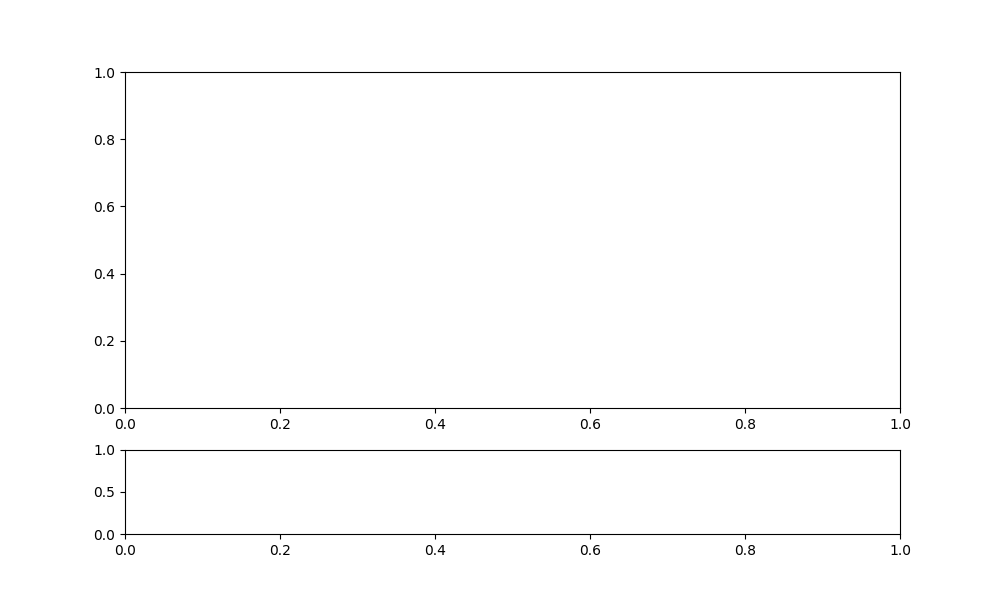

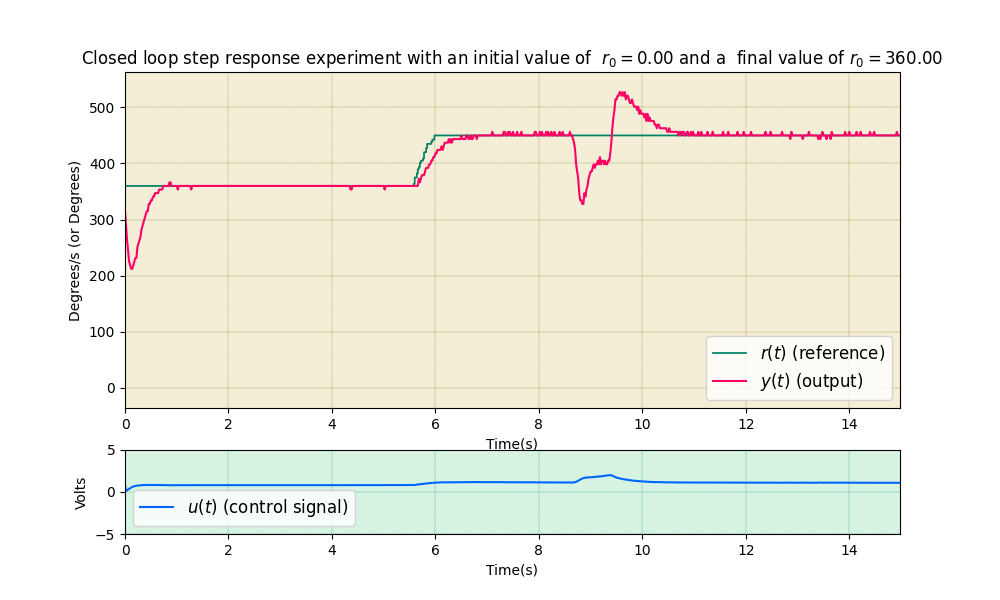

In [171]:


# programación del controlador y obtención de la respuesta al escalónr Amstron
motor.set_pid(mi_motor,kp=Kp_ah,ki=Ki_ah,kd=0,beta=1, output="speed")
tah, rah, yah, uah  =motor.step_closed(mi_motor,r0=0, r1=360, t0=0, t1=15);

plt.savefig("Robustez_Asmtron_Hagglund_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook


+ **Probar todos** Repita los pasos 1 a 4 para los 3 controladores PI, es decir para el sintonizado por las reglas de Ziegler-Nichols; de Zhang; y, Åström and Hägglund.  

#### Caso Zahg 

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  373   (2,)


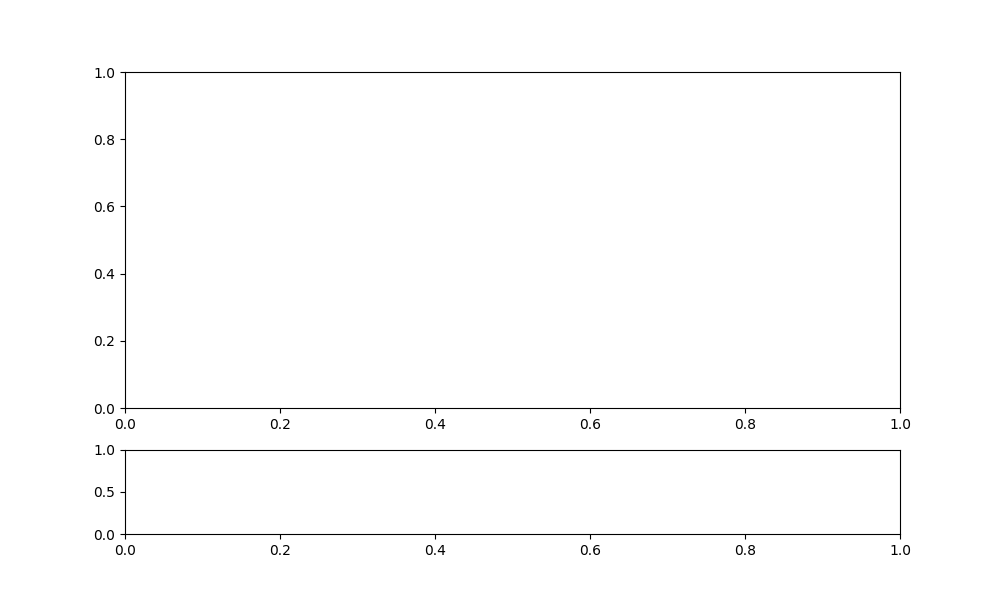

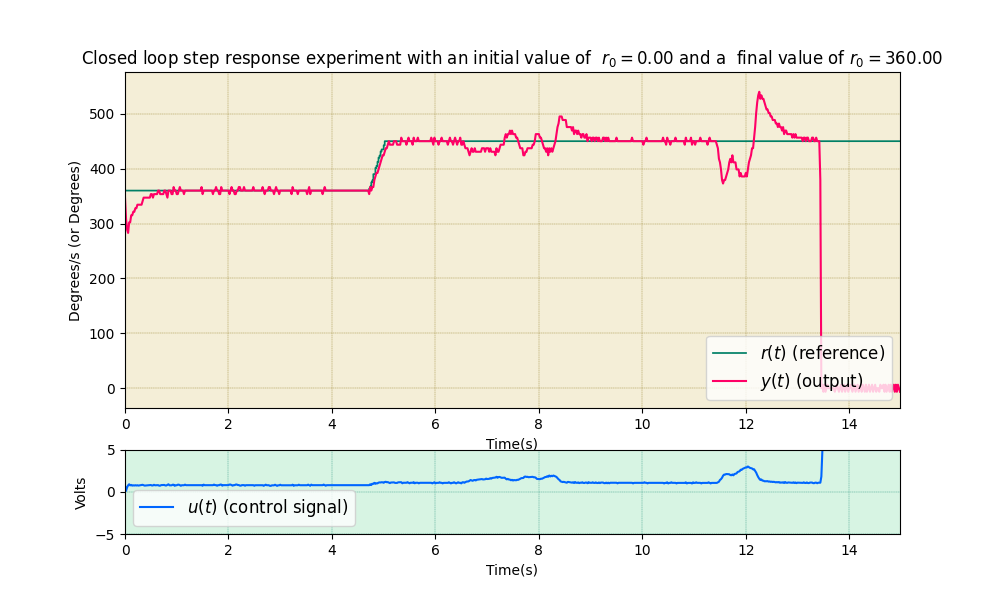

In [172]:
# robustes zahg
motor.set_pid(mi_motor,kp=Kp_Zhang,ki=Ki_Zhang,kd=0,beta=1, output="speed")
tzh, rzh, yzh, uzh  =motor.step_closed(mi_motor,r0=0, r1=360, t0=0, t1=15);

plt.savefig("Robustez_Zhag_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook




#### Caso Zigle Nichols

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  379   (2,)


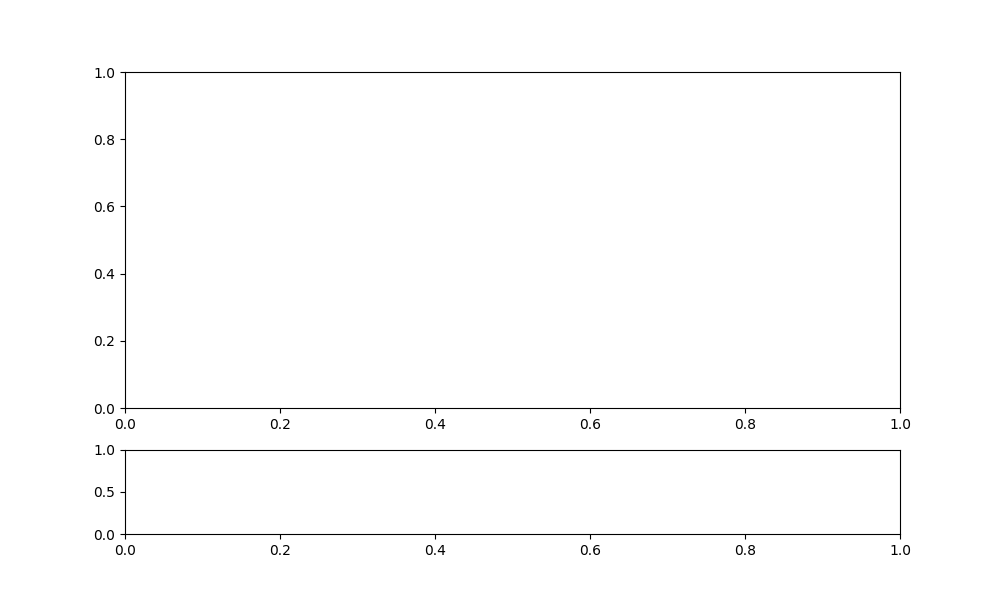

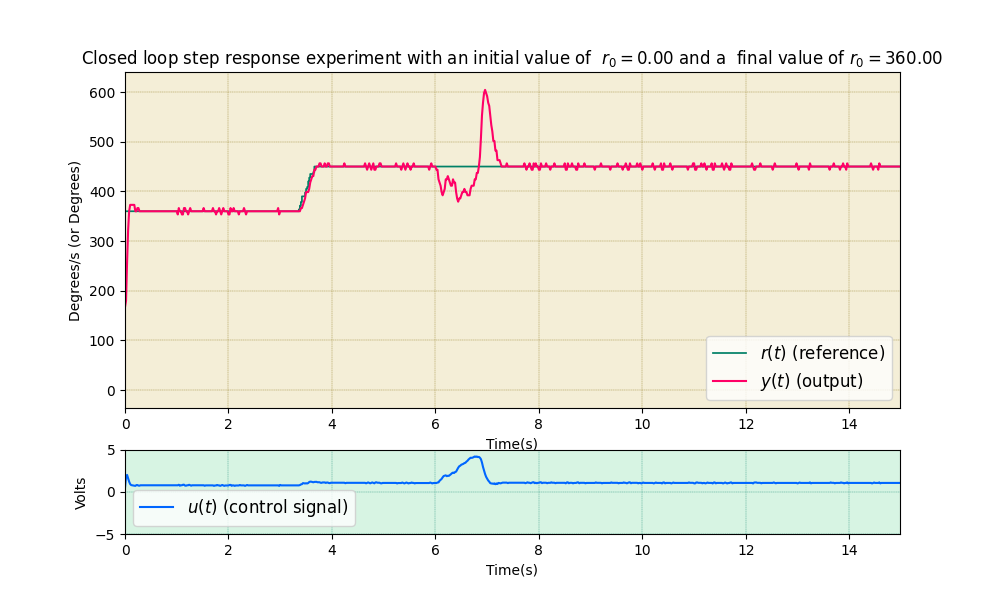

In [174]:
# robustes Zigler Nichols
motor.set_pid(mi_motor,kp=Kp_zn,ki=Ki_zn,kd=0,beta=1, output="speed")
tzn, rzn, yzn, uzn  =motor.step_closed(mi_motor,r0=0, r1=360, t0=0, t1=15);

plt.savefig("Robustez_Ziegler_Nichols_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

#### Preguntas orientadoras

+ Grafique en la misma figura la respuesta al escalón con los 3 controladores PI, a saber: el de Ziegler-Nichols, el de Zhang y el Åström and Hägglund.

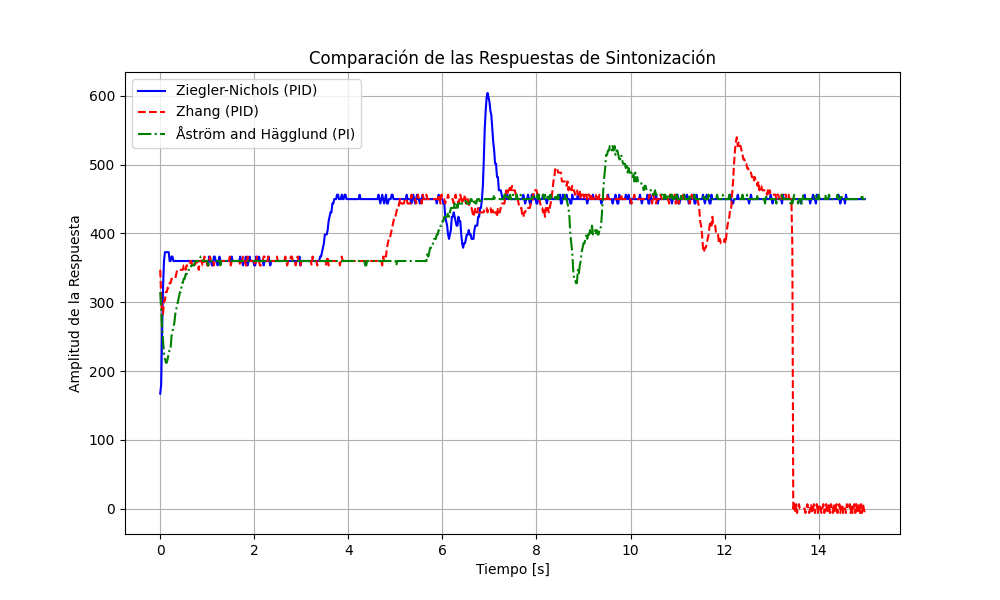

In [175]:
#Graficar las respuestas

plt.figure(figsize=(10, 6))

plt.plot(tzn, yzn, label='Ziegler-Nichols (PID)', linestyle='-', color='b')
plt.plot(tzh, yzh, label='Zhang (PID)', linestyle='--', color='r')
plt.plot(tah, yah, label='Åström and Hägglund (PI)', linestyle='-.', color='g')

plt.title('Comparación de las Respuestas de Sintonización')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud de la Respuesta')
plt.legend()
plt.grid(True)
plt.show()



+  Con base en la gráfica producida en la pregunta anterior, ordene  los 3 métodos de sintonia dando una puntuación cualitativa de 1 a 3 a cada uno en una tabla con dos columnas. En la primera considere el desempeño en la respuesta temporal (tiempo de establecimiento, sobrepico, tiempo de subida) y en la otra, el nivel de rechazo de perturbaciones de cada controlador, según usted logró percibir.   



### Experimento y pregunta

Ajuste un controlador unicamente proporcional con ganancia `kp=1`. ¿Que pasa con la respuesta y por qué?


Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  382   (2,)


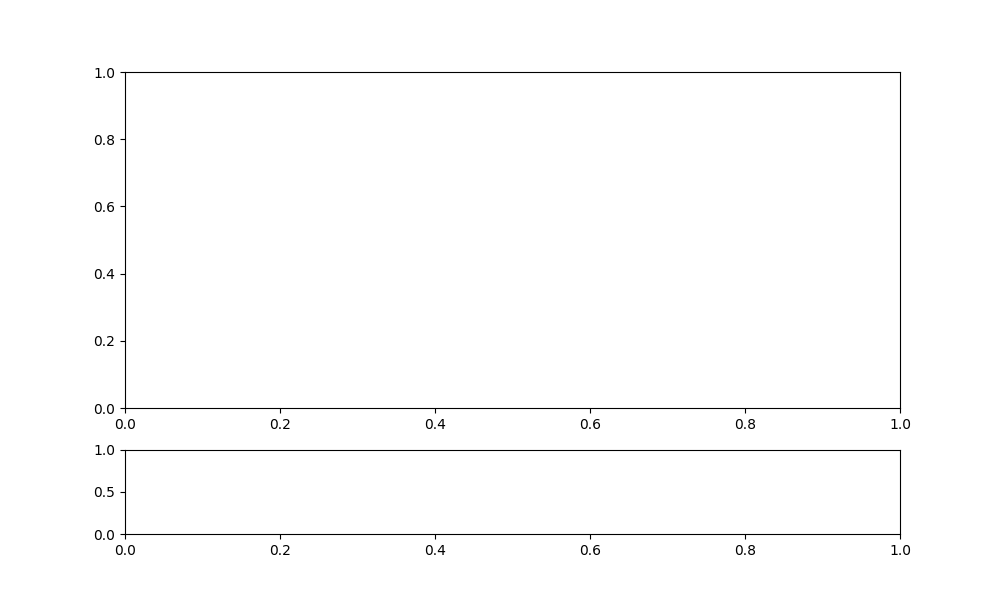

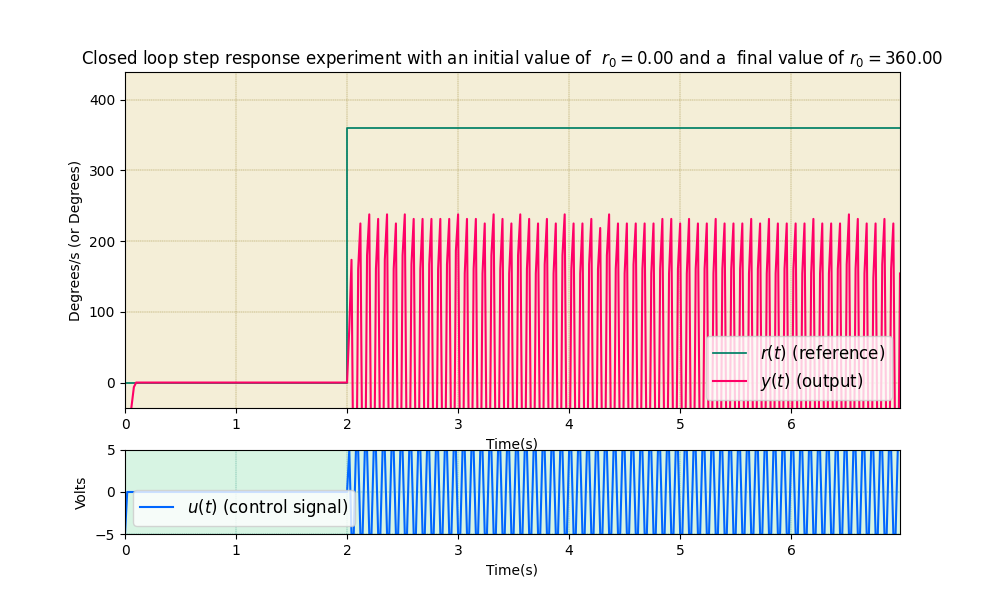

In [176]:
# robustes Zigler Nichols
motor.set_pid(mi_motor,kp=1,ki=Ki_zn,kd=0,beta=1, output="speed")
tzn, rzn, yzn, uzn  =motor.step_closed(mi_motor,r0=0, r1=360, t0=2, t1=5);

plt.savefig("Kp=1_Ziegler_Nichols_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

## Control de Ángulo

Ahora vamos a controlar el ángulo de giro $\theta$ del Motor DC. De acuerdo con el  [modelo lineal presentado en este documento](https://github.com/nebisman/UNDCMotor/blob/main/docs/modelo_matematico_unmotor.pdf), la relación dinámica entre la tensión aplicada al Motor $U$ y el ángulo de desplazamiento del motor $\theta$ está dada por la siguiente ecuación:

$$G_{\theta}(s)=\frac{\theta(s)}{U(s)}=\dfrac{\alpha}{s(\tau s + 1)} e^{-Ls}$$

Note que simplemente el modelo incluye un factor $1/s$, *indicando que el ángulo $\theta$ es la integral de la velocidad angular $\Omega$*.


### Pregunta

Si consideramos como salida del sistema el ángulo $\theta$ del motor, ¿tenemos un sistema estable o inestable en lazo abierto? 

### Método de sintonía en la frecuencia (o en lazo cerrado) de Ziegler Nichols

Este método se puede usar para sistemas que son inestables en lazo abierto. El método funciona como lo ilustra la figura siguiente:

<img src="https://github.com/nebisman/UNThermal/blob/main/code/python_code/notebooks_lab_2024_2/ziegler_frequency.png?raw=true" alt="Gráfica de resultados" width="500"/>





El controlador se ajusta de manera que la acción sea únicamente proporcional, esto es, $k_d=0$ y $k_i=0$. La ganancia se incrementa lentamente hasta que la planta, denotada $G(s)$, justo comienza una oscilación sostenida. Asi obtienen los siguientes dos parámetros:

+ **La ganancia última $K_u$:** es la ganancia proporcional $k_p$ en el controlador con la cual inicia la oscilación sostenida.
+ **El periodo último $T_u$:** es el periodo de la oscilación sostenida en la salida del sistema.


La tabla siguiente muestra algunos valores sugeridos en la literatura para la sintonía en frecuencia:



| **Propuesto por** | **Ganancia Proporcional** $k_p$                | **Ganancia Integral** $k_i$         | **Ganancia Derivativa** $k_d$ |
|-------------------|------------------------------------------------|-------------------------------------|-------------------------------|
| **Ziegler y Nichols (1948)**   |   $k_p=0.6\, K_u$   | $\dfrac{k_p}{0.5\,T_u}$ |  $ 0.125\,T_u\,k_p$|
|**Åström and Hägglund (2006)** |   $k_p = K_u\, (0.3 - 0.1\,\beta^4)$;   $\beta=\dfrac{1}{\alpha\,K_u}$ | $k_p \dfrac{1+2\,\beta}{0.6\,T_u}$                     |     $k_p \,T_u \dfrac{0.15\,(1-\beta)}{1-0.95\,\beta}$            |


### Experimento de Ziegler - Nichols en lazo cerrado

+ Realice el experimento de Ziegler - Nichols para obtener $T_u$ y $K_u$. Cuando alcance el valor de ganancia última $K_u$, puede dar click en la gráfica para medir el periodo de la señal de salida.

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  385   (2,)


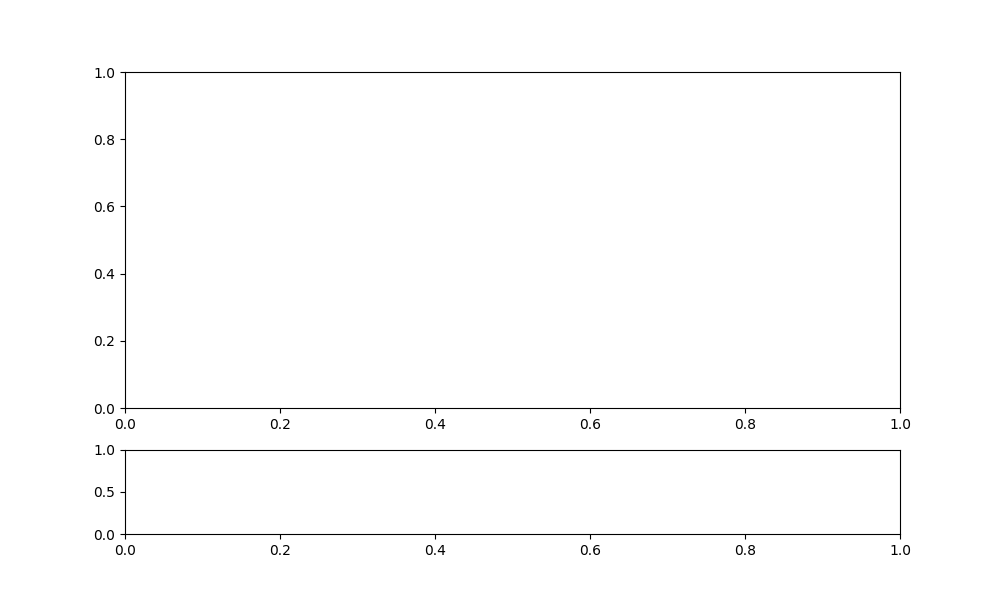

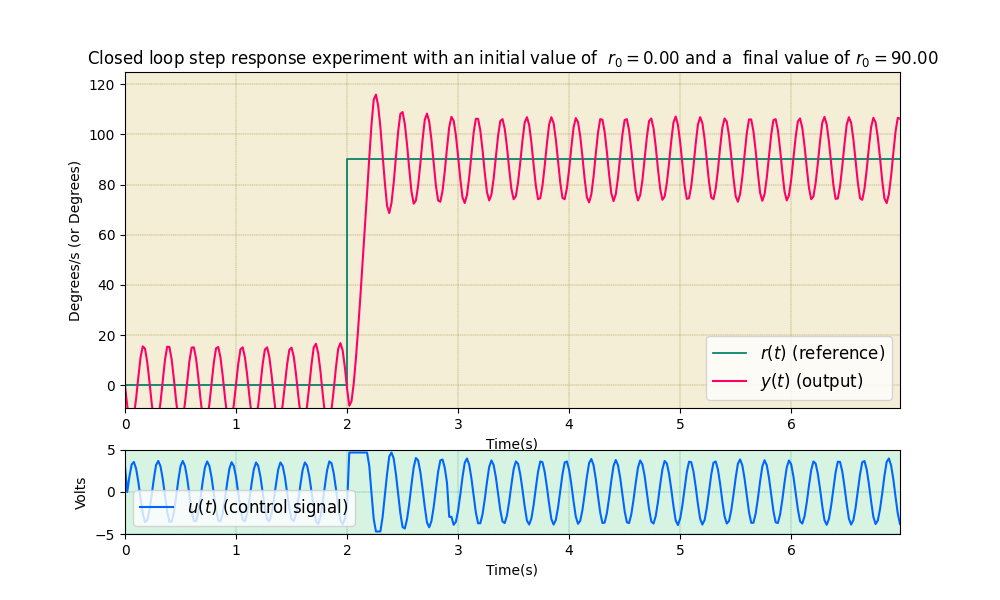

In [177]:
# cambie la ganancia lentamente para obtener Ku
kp =0.23

motor.set_pid(mi_motor,kp=kp, ki=0, kd=0, beta=1, output="angle",deadzone=0.3)
tas, ras, yas, uas = motor.step_closed(mi_motor,r0=0, r1=90, t0=2, t1=5);

# este código es solo para que picando la grafica tengamos un cursor que nos dice el valor
import mplcursors
fig = plt.gcf()
ax, au = fig.get_axes()
mplcursors.cursor(ax.lines) 

plt.savefig("Experimento_cerrado_0.2_Ziegler_Nichols_360.png", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook



### Respuesta Zigle Nichols  u Astrom and Hanglu para el caso de larespuesta Ku

Por tanto la respuesta vista en la anterior imajen esta dada en alrededor de de 0.23

por tanto Ku = 0.23

T =  por dos tiempos tomados del pico, son 
t1 = 2.506
t2 = 2.706

T = t2 -t1 


| **Propuesto por** | **Ganancia Proporcional** $k_p$                | **Ganancia Integral** $k_i$         | **Ganancia Derivativa** $k_d$ |
|-------------------|------------------------------------------------|-------------------------------------|-------------------------------|
| **Ziegler y Nichols (1948)**   |   $k_p=0.6\, K_u$   | $\dfrac{k_p}{0.5\,T_u}$ |  $ 0.125\,T_u\,k_p$|
|**Åström and Hägglund (2006)** |   $k_p = K_u\, (0.3 - 0.1\,\beta^4)$;   $\beta=\dfrac{1}{\alpha\,K_u}$ | $k_p \dfrac{1+2\,\beta}{0.6\,T_u}$                     |     $k_p \,T_u \dfrac{0.15\,(1-\beta)}{1-0.95\,\beta}$            |
 

In [178]:
t1 =  2.506
t2 =  2.706
Tu = t2 - t1
print(Tu)
Ku = 0.23

def Zigler_NicholsKu(ku, Tu):
    kp = 0.6 * ku
    ki = kp / (0.5 * Tu)
    Kd  =0.125 * Tu * kp
    return(kp, ki, Kd)

def AstromHangglund_ku(ku, Tu, alfa):
    b = 1 / (alfa * ku)
    kp = ku *(0.3 - (0.1 * (b**4 )))
    ki = kp*((1 + (2 * b)) / (0.6 * Tu))
    kd = kp * Tu *(0.15 * (1- b) ) / (1 - (0.95*b))
    return kp, ki, kd  


0.20000000000000018


### Experimento 

Realice los siguientes experimentos con un escalón de referencia de ángulo que cambia desde `r0=0` a `r1=90` grados. Para los 2 experimentos use nombres diferentes en las variables de salida para después graficarlos conjuntamente. Tenga en cuanta usar la función `set_pid` como en el ejemplo anterior.

+ Use las expresiones de **Ziegler y Nichols** para sintonizar las ganancias del PID en el control del ángulo y obtenga la respuesta al escalón.


+ Use las expresiones de **Åström and Hägglund** para sintonizar las ganancias del PID en el control de ángulo y obtenga la respuesta al escalón.

#### Caso para Ziegler y Nichols

Obtenemos la Sintoniacion y vemos:

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  349   (2,)


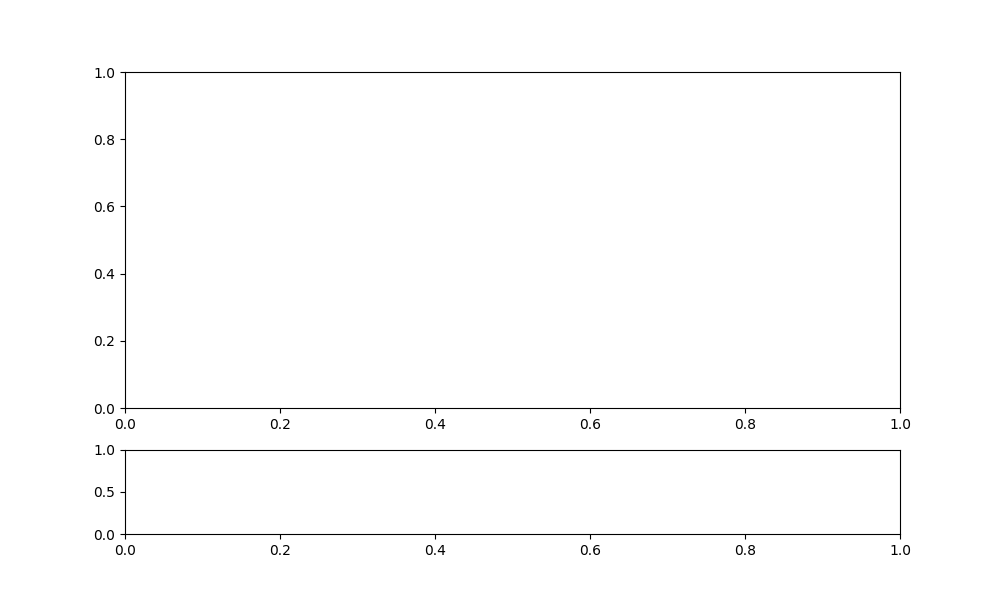

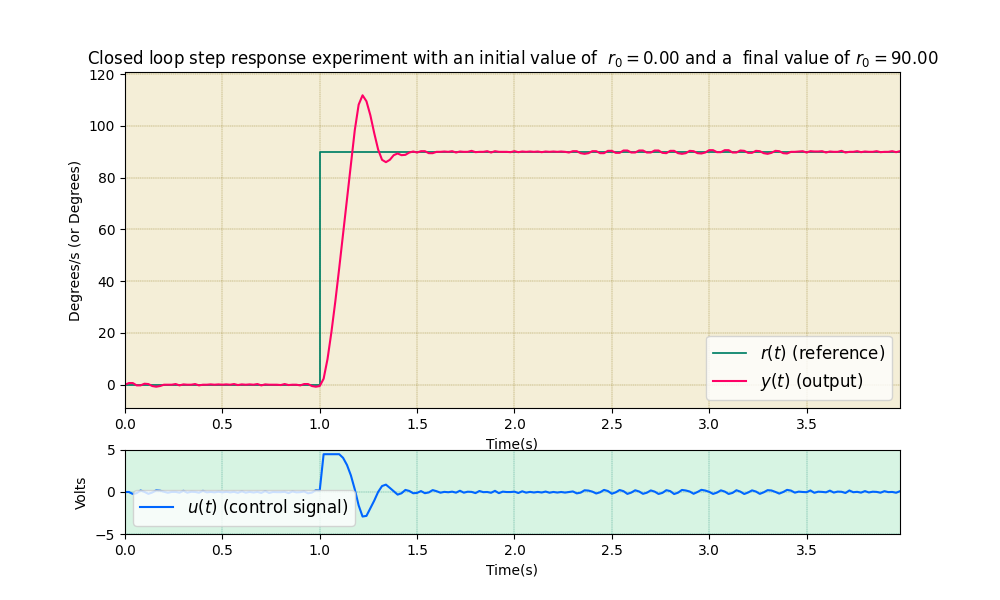

In [161]:
Kp_zn_ku ,Ki_zn_ku, kd_zn_ku= Zigler_NicholsKu(Ku, Tu)


motor.set_pid(mi_motor,kp=Kp_zn_ku,ki=Ki_zn_ku,kd=kd_zn_ku,beta=1,deadzone= 0.5, output="angle")
tzn_ku, rzn_ku, yzn_ku, uzn_ku  =motor.step_closed(mi_motor,r0=0, r1=90, t0=1, t1=3);

# este código es solo para que picando la grafica tengamos un cursor que nos dice el valor
import mplcursors
fig = plt.gcf()
ax, au = fig.get_axes()
mplcursors.cursor(ax.lines) 

plt.savefig("Experimentro_Zingler_Nichols_Respuesta_escalon_PID_con_KU_TU_", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook


#### Caso Amstron Hungle

Connected successfully to MQTT Broker!
succesfull change of PID parameters
Connected successfully to MQTT Broker!
Subscribed:  352   (2,)


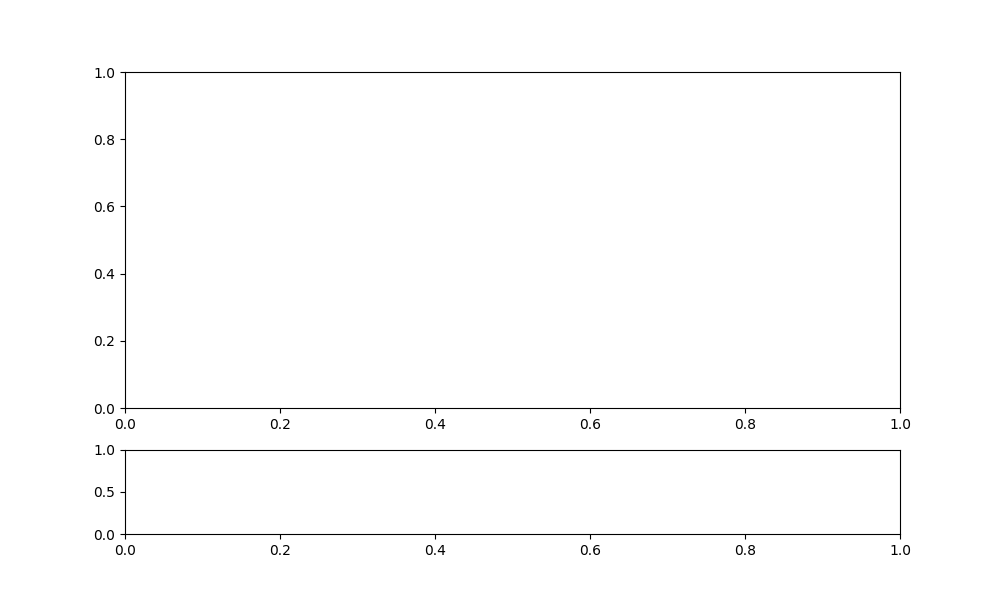

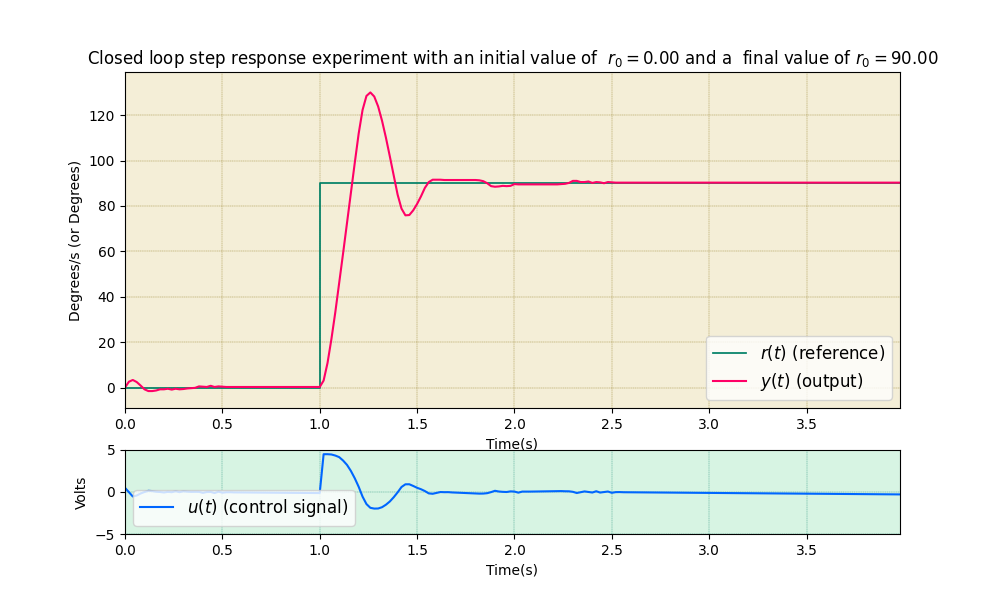

In [163]:
Kp_ah_ku ,Ki_ah_ku, kd_ah_ku= AstromHangglund_ku(Ku, Tu, alfa)


motor.set_pid(mi_motor,kp=Kp_ah_ku,ki=Ki_ah_ku,kd=kd_ah_ku,beta=1,deadzone= 0.5, output="angle")
tah_ku, rah_ku, yah_ku, uah_ku  =motor.step_closed(mi_motor,r0=0, r1=90, t0=1, t1=3);

# este código es solo para que picando la grafica tengamos un cursor que nos dice el valor
import mplcursors
fig = plt.gcf()
ax, au = fig.get_axes()
mplcursors.cursor(ax.lines) 

plt.savefig("Experimentro_Astrom_Hangglund_Respuesta_escalon_PID_con_KU_TU_", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

#### Preguntas

+ Grafique la respuesta de los dos controladores en una misma gráfica y determine, en su concepto, el mejor.


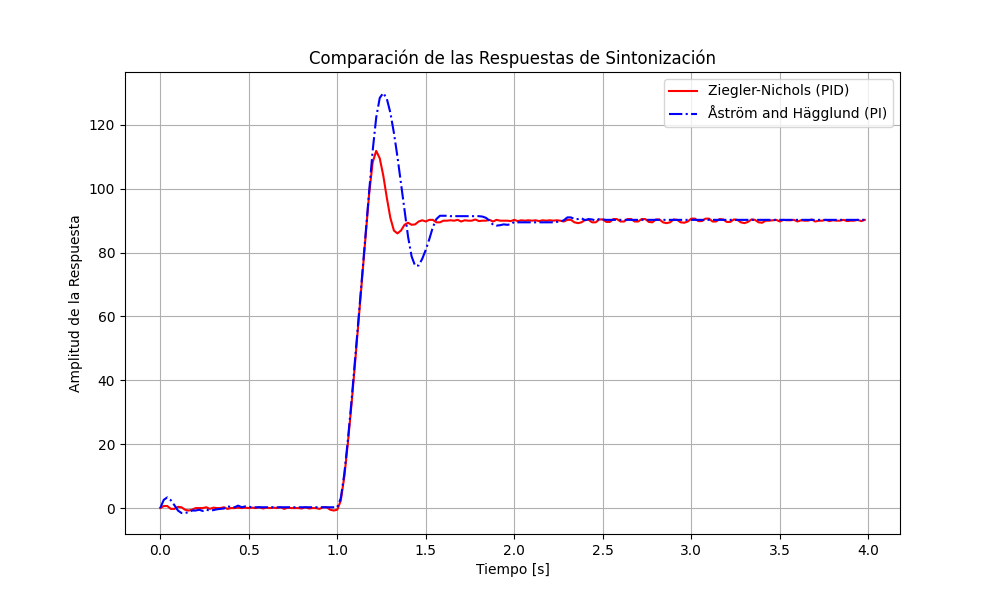

In [164]:
#Graficar las respuestas

plt.figure(figsize=(10, 6))

plt.plot(tzn_ku, yzn_ku, label='Ziegler-Nichols (PID)', linestyle='-', color='r')
plt.plot(tah_ku, yah_ku, label='Åström and Hägglund (PI)', linestyle='-.', color='b')

plt.title('Comparación de las Respuestas de Sintonización')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud de la Respuesta')
plt.legend()
plt.grid(True)
plt.show()

### Reglas empíricas para sintonizar un PID

Las siguientes reglas empíricas, obtenidas tras décadas de experiencia, ayudan en la sintonía de un PID

1. *Al incremental la ganancia proporcional $k_p$, disminuye la estabilidad*
1. *El error decae más rapidamente si la ganancia integral $k_i$ se incrementa*
1. *Al aumentar la ganancia integral $k_i$,se disminuye la estabilidad*
1. *Al incrementar la constante derivativa $k_d$ se mejora la estabilidad*

#### Experimento

+ Partiendo de las ganancias ajustadas previamente (por Ziegler Nichols o por Åström and Hägglund), use las reglas empíricas para mejorar la respuesta del control de ángulo del motor, tanto cuanto sea posible.  